In [1]:
import ipcoal
import toytree
import os
import numpy as np
import seaborn as sns
import toyplot

## Define a species tree

In [2]:
# generate a random species tree topology
tree = toytree.rtree.unittree(ntips=8, treeheight=1e6,seed = 123)

# draw the species tree
canvas, axes = tree.draw(ts='p');

# add a title
canvas.text(
    x=canvas.width / 2., 
    y=20,
    text="Species tree", 
    style={"font-size": "14px"},
);

<svg class="toyplot-canvas-Canvas" height="260.0px" id="te867e33ce58049b7b2185feaf31071ee" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r6 r4 r7 r2 r5 r0 r3 r1 idx: 0
name: r6
dist: 500000
support: 100
height: 0 0 idx: 1
name: r4
dist: 500000
support: 100
height: 0 1 idx: 2
name: r7
dist: 500000
support: 100
height: 0 2 idx: 3
name: r2
dist: 500000
support: 100
height: 0 3 idx: 4
name: r5
dist: 250000
support: 100
height: 0 4 idx: 5
name: r0
dist: 250000
support: 100
height: 0 5 idx: 6
name: r3
dist: 500000
support: 100
height: 0 6 idx: 7
name: r1
dist: 750000
support: 100
height: 0 7 idx: 8
name: 8
dist: 250000
support: 100
height: 250000 8 idx: 9
name: 9
dist: 250000
support: 100
height: 500000 9 idx: 10
name: 10
dist: 250000
support: 100
height: 500000 10 idx: 11
name: 11
dist: 250000
support: 100
height: 500000 11 idx: 12
name: 12
dist: 250000
support: 100
height: 750000 12 idx: 13
name: 13
dist: 250000
support: 100
height: 750000 13 idx: 14
name: 14
dist: 250000
support: 100
height: 1000000 14 0 500000 1000000 Species tree

## Define a model based on the species tree

In [3]:
# or define a model with Ne = 1e5
mod = ipcoal.Model(tree=tree, 
                      Ne=1e6, 
                      seed=123)
mod_ = mod.sim_snps(1)
genealogy = toytree.tree(mod_.df['genealogy'][0])

## Generate a gene tree

In [4]:
# draw the species tree
canvas, axes = genealogy.draw(ts='p');

# add a title
canvas.text(
    x=canvas.width / 2., 
    y=20,
    text="Gene tree", 
    style={"font-size": "14px"},
);

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t04776329f0f04568bfac9d83c6c35c01" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r4 r6 r2 r7 r3 r5 idx: 0
name: r1
dist: 1102620
support: 100
height: 7 0 idx: 1
name: r0
dist: 1102620
support: 100
height: 7 1 idx: 2
name: r4
dist: 847342
support: 100
height: 4 2 idx: 3
name: r6
dist: 847342
support: 100
height: 4 3 idx: 4
name: r2
dist: 1449640
support: 100
height: 0 4 idx: 5
name: r7
dist: 1449640
support: 100
height: 0 5 idx: 6
name: r3
dist: 2064020
support: 100
height: 5 6 idx: 7
name: r5
dist: 2064020
support: 100
height: 5 7 idx: 8
name: 8
dist: 548039
support: 100
height: 1102627 8 idx: 9
name: 9
dist: 803320
support: 100
height: 847346 9 idx: 10
name: 10
dist: 616919
support: 100
height: 1650666 10 idx: 11
name: 11
dist: 817945
support: 100
height: 1449640 11 idx: 12
name: 12
dist: 2791510
support: 100
height: 2267585 12 idx: 13
name: 13
dist: 2995070
support: 100
height: 2064025 13 idx: 14
name: 14
dist: 1
support: 100
height: 5059095 14 0 2529548 5059095 Gene tree

## Set sequence evolution parameters

In [5]:
state_frequencies = [0.25,0.25,0.25,0.25]
kappa = 1
nsites = 10
mut = 1e-8

## Evolve with `SeqModel`

### write a function to make calling this easy

In [6]:
def sm_run(tree,
           nsites,
           mut,
           kappa,
           state_frequencies,
           return_tstv = False):
    seqmod = ipcoal.SeqModel.SeqModel(state_frequencies=state_frequencies,
                                      kappa=kappa)
    seqs = seqmod.feed_tree(newick=tree.write(tree_format=5),nsites=nsites, mut = mut)
    seqs = seqs[np.argsort(tree.treenode.get_leaf_names()[::-1]),:]
    if not return_tstv:
        return(seqs)
    # we might want to return the tstv value to input to seqgen
    else:
        return([seqs,seqmod.tstv])

In [7]:
seqs, tstv = sm_run(genealogy,nsites,mut,kappa,state_frequencies,return_tstv=True)
seqs

array([[1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1],
       [1, 1, 2, 1, 0, 3, 0, 2, 1, 1]], dtype=int8)

## Evolve with `SeqGen`

### write a function to do this with HKY

In [8]:
def sg_run(tree,nsites,mut,tstv,state_frequencies):
    cmd = (
            "{} -mHKY -l {} -s {} -t {} -f {} {} {} {} -q <<< \"{}\";"
            .format("seq-gen", 
                    nsites, 
                    mut, 
                    tstv,
                    state_frequencies[0],
                    state_frequencies[1],
                    state_frequencies[2],
                    state_frequencies[3],
                    tree.write(tree_format=5))
        )

    res = ! {cmd}

    sgseqs = res[-tree.ntips:]

    sgseqs = [i.split() for i in sgseqs]

    sgdict = {i[0]:i[1] for i in sgseqs}

    sgseqs = np.array([sgdict[i] for i in mod.names])

    sgseqs = np.array([np.array([i for i in q]) for q in sgseqs])

    sub = 0
    for letter in ["A","C","G","T"]:
        sgseqs[sgseqs == letter] = sub
        sub += 1

    sgseqs = sgseqs.astype(int)

    return(sgseqs)

In [9]:
sg_run(genealogy,nsites,mut,tstv,state_frequencies)

array([[1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 2, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2],
       [1, 2, 0, 2, 3, 3, 0, 1, 3, 2]])

## Now do some analysis:

### Are we getting similar numbers of SNPs?

### run 1

In [10]:
nsites = 100
mut = 1e-8
kap = np.random.choice([np.random.uniform(0,1),np.random.uniform(5)])
state_frequencies = np.random.dirichlet(np.ones(4),size=1)[0]

sm_nsnps = []
sg_nsnps = []
for i in range(10000):
    # run both models
    sm_seqs, tstv = sm_run(genealogy, 
                           nsites,
                           mut,
                           kap,
                           state_frequencies,
                           return_tstv=True)
    sg_seqs = sg_run(genealogy, 
                     nsites,
                     mut,
                     tstv,
                     state_frequencies)

    # count snps in seqmodel
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sm_seqs[:,i])) > 1:
            nsnps += 1
    sm_nsnps.append(nsnps)

    # count snps in seqgen
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sg_seqs[:,i])) > 1:
            nsnps += 1
    sg_nsnps.append(nsnps)

print(kap)
print(state_frequencies)
print(np.mean(sm_nsnps))
print(np.mean(sg_nsnps))

# seed = random 1e6, k=4.5(sm), -t = 3(sg), 10000 reps
#sns.distplot(sg_nsnps,hist=True,kde=False);
#sns.distplot(sm_nsnps,hist=True,kde=False);

sg_ys = []
sm_ys = []
for i in range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1):
    sg_ys.append(np.sum(np.array(sg_nsnps) == i))
    sm_ys.append(np.sum(np.array(sm_nsnps) == i))
    
x = range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1)
y1 = sg_ys
y2 = sm_ys

canvas = toyplot.Canvas(width=1000, height=300)
axes = canvas.cartesian()
mark1 = axes.bars(x, y1,opacity=.5)
mark2 = axes.bars(x, y2,opacity=.5)

3.6616692259674193
[0.14904957 0.48479887 0.10191062 0.26424094]
17.5043
17.5105


<svg class="toyplot-canvas-Canvas" height="300.0px" id="t451873d633974e5dbdd265c7fd5651d2" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1000.0 300.0" width="1000.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 10 20 30 0 500 1000

### run 2

In [11]:
nsites = 100
mut = 1e-8
kap = np.random.choice([np.random.uniform(0,1),np.random.uniform(5)])
state_frequencies = np.random.dirichlet(np.ones(4),size=1)[0]

sm_nsnps = []
sg_nsnps = []
for i in range(10000):
    # run both models
    sm_seqs, tstv = sm_run(genealogy, 
                           nsites,
                           mut,
                           kappa,
                           state_frequencies,
                           return_tstv=True)
    sg_seqs = sg_run(genealogy, 
                     nsites,
                     mut,
                     tstv,
                     state_frequencies)

    # count snps in seqmodel
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sm_seqs[:,i])) > 1:
            nsnps += 1
    sm_nsnps.append(nsnps)

    # count snps in seqgen
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sg_seqs[:,i])) > 1:
            nsnps += 1
    sg_nsnps.append(nsnps)

print(kap)
print(state_frequencies)
print(np.mean(sm_nsnps))
print(np.mean(sg_nsnps))

sg_ys = []
sm_ys = []
for i in range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1):
    sg_ys.append(np.sum(np.array(sg_nsnps) == i))
    sm_ys.append(np.sum(np.array(sm_nsnps) == i))
    
x = range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1)
y1 = sg_ys
y2 = sm_ys

canvas = toyplot.Canvas(width=1000, height=300)
axes = canvas.cartesian()
mark1 = axes.bars(x, y1,opacity=.5)
mark2 = axes.bars(x, y2,opacity=.5)

3.4699802596550926
[0.58560873 0.02150134 0.37123211 0.02165782]
17.4047
17.4416


<svg class="toyplot-canvas-Canvas" height="300.0px" id="tc8f3b6d8e41640298ba4dec47aecf864" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1000.0 300.0" width="1000.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 5 15 25 35 0 500 1000

### run 3

In [12]:
nsites = 100
mut = 1e-8
kappa = np.random.choice([np.random.uniform(0,1),np.random.uniform(5)])
state_frequencies = np.random.dirichlet(np.ones(4),size=1)[0]

sm_nsnps = []
sg_nsnps = []
for i in range(10000):
    # run both models
    sm_seqs, tstv = sm_run(genealogy, 
                           nsites,
                           mut,
                           kappa,
                           state_frequencies,
                           return_tstv=True)
    sg_seqs = sg_run(genealogy, 
                     nsites,
                     mut,
                     tstv,
                     state_frequencies)

    # count snps in seqmodel
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sm_seqs[:,i])) > 1:
            nsnps += 1
    sm_nsnps.append(nsnps)

    # count snps in seqgen
    nsnps = 0
    for i in range(nsites):
        if len(np.unique(sg_seqs[:,i])) > 1:
            nsnps += 1
    sg_nsnps.append(nsnps)

print(kappa)
print(state_frequencies)
print(np.mean(sm_nsnps))
print(np.mean(sg_nsnps))

sg_ys = []
sm_ys = []
for i in range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1):
    sg_ys.append(np.sum(np.array(sg_nsnps) == i))
    sm_ys.append(np.sum(np.array(sm_nsnps) == i))
    
x = range(np.min([np.min(sg_nsnps),np.min(sm_nsnps)]),np.max([np.max(sg_nsnps),np.max(sm_nsnps)])+1)
y1 = sg_ys
y2 = sm_ys

canvas = toyplot.Canvas(width=1000, height=300)
axes = canvas.cartesian()
mark1 = axes.bars(x, y1,opacity=.5)
mark2 = axes.bars(x, y2,opacity=.5)

0.6761387644141652
[0.00302344 0.0218893  0.18707658 0.78801068]
16.6564
16.5944


<svg class="toyplot-canvas-Canvas" height="300.0px" id="t2b8bd592a6644c80ad9e0fdac912772a" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1000.0 300.0" width="1000.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 10 20 30 0 500 1000

## Are we getting the same frequencies for each base?

In [13]:
nsites = 100000
mut = 1e-6
kappa = np.random.choice([np.random.uniform(0,1),np.random.uniform(5)])
state_frequencies = np.random.dirichlet(np.ones(4),size=1)[0]

sm_basefreqs = np.zeros((10,len(mod.names),4),dtype=np.int64)
sg_basefreqs = np.zeros((10,len(mod.names),4),dtype=np.int64)

nruns = 10
for run in range(nruns):
    # run both models
    sm_seqs, tstv = sm_run(genealogy, 
                           nsites,
                           mut,
                           kappa,
                           state_frequencies,
                           return_tstv=True)
    sg_seqs = sg_run(genealogy, 
                     nsites,
                     mut,
                     tstv,
                     state_frequencies)
    for idx,seq in enumerate(sm_seqs):
        sm_basefreqs[run,idx,0]=np.sum(seq == 0)
        sm_basefreqs[run,idx,1]=np.sum(seq == 1)
        sm_basefreqs[run,idx,2]=np.sum(seq == 2)
        sm_basefreqs[run,idx,3]=np.sum(seq == 3)
        
    for idx,seq in enumerate(sg_seqs):
        sg_basefreqs[run,idx,0]=np.sum(seq == 0)
        sg_basefreqs[run,idx,1]=np.sum(seq == 1)
        sg_basefreqs[run,idx,2]=np.sum(seq == 2)
        sg_basefreqs[run,idx,3]=np.sum(seq == 3)

In [14]:
np.mean(sm_basefreqs-sg_basefreqs,axis=0)

array([[  28.1,  -12. ,    3.2,  -19.3],
       [  35.7,   11.6,  -33.9,  -13.4],
       [-100.5,   60.6,    3.8,   36.1],
       [ -60.9,   55.6,   29.7,  -24.4],
       [  -9.3,   71.8,  -29.8,  -32.7],
       [ -33.7,   -8. ,   23.7,   18. ],
       [  -3.3,  -34.5,    6.9,   30.9],
       [  74.7,  -63.2,   -4.7,   -6.8]])

## Are taxa the same distance from each other?

### Take the mean of the distances between the seqgen pairs and the seqmodel pairs:

In [15]:
nsites = 10000
mut = 1e-8
kappa = np.random.choice([np.random.uniform(0,1),np.random.uniform(5)])
state_frequencies = np.random.dirichlet(np.ones(4),size=1)[0]

nruns = 1000
sm_distobj = np.zeros((nruns,len(mod.names),len(mod.names)),dtype=np.int64)
sg_distobj = np.zeros((nruns,len(mod.names),len(mod.names)),dtype=np.int64)

for run in range(nruns):
    # run both models
    sm_seqs, tstv = sm_run(genealogy,
                           nsites,
                           mut,
                           kappa,
                           state_frequencies,
                           return_tstv=True)
    sg_seqs = sg_run(genealogy, 
                     nsites,
                     mut,
                     tstv,
                     state_frequencies)

    distmat = np.zeros((len(sm_seqs),len(sm_seqs)),dtype=np.int64)
    for row in range(distmat.shape[0]):
        for col in range(distmat.shape[1]):
            dist = np.sum(sm_seqs[row] != sm_seqs[col])
            distmat[row,col] = dist
    sm_distobj[run] = distmat
    
    distmat = np.zeros((len(sg_seqs),len(sg_seqs)),dtype=np.int64)
    for row in range(distmat.shape[0]):
        for col in range(distmat.shape[1]):
            dist = np.sum(sg_seqs[row] != sg_seqs[col])
            distmat[row,col] = dist
    sg_distobj[run] = distmat

In [16]:
meanmat = np.abs(np.mean(sg_distobj-sm_distobj,axis=0))
meanmat

array([[0.   , 0.418, 0.311, 1.57 , 0.704, 0.168, 0.476, 0.995],
       [0.418, 0.   , 1.156, 1.179, 0.091, 0.09 , 0.148, 0.062],
       [0.311, 1.156, 0.   , 0.834, 1.168, 0.198, 1.367, 0.027],
       [1.57 , 1.179, 0.834, 0.   , 1.108, 0.624, 1.089, 1.853],
       [0.704, 0.091, 1.168, 1.108, 0.   , 0.311, 0.382, 0.107],
       [0.168, 0.09 , 0.198, 0.624, 0.311, 0.   , 0.672, 0.881],
       [0.476, 0.148, 1.367, 1.089, 0.382, 0.672, 0.   , 0.269],
       [0.995, 0.062, 0.027, 1.853, 0.107, 0.881, 0.269, 0.   ]])

In [17]:
toyplot.matrix(meanmat);

<svg class="toyplot-canvas-Canvas" height="600px" id="tb5306fc7493943e1b2e7c7c19a4d1186" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600 600" width="600px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 0 0.000000 0.418000 0.311000 1.570000 0.704000 0.168000 0.476000 0.995000 1 0.418000 0.000000 1.156000 1.179000 0.091000 0.090000 0.148000 0.062000 2 0.311000 1.156000 0.000000 0.834000 1.168000 0.198000 1.367000 0.027000 3 1.570000 1.179000 0.834000 0.000000 1.108000 0.624000 1.089000 1.853000 4 0.704000 0.091000 1.168000 1.108000 0.000000 0.311000 0.382000 0.107000 5 0.168000 0.090000 0.198000 0.624000 0.311000 0.000000 0.672000 0.881000 6 0.476000 0.148000 1.367000 1.089000 0.382000 0.672000 0.000000 0.269000 7 0.995000 0.062000 0.027000 1.853000 0.107000 0.881000 0.269000 0.000000

# Turn to implementation in `ipcoal`, making sure that tips match seqs:

# Locus sims first:

## Check that the tips match up right with `SeqGen`

In [18]:
# or define a model with Ne = 1e6
mod = ipcoal.Model(tree=tree, 
                      Ne=1e6, 
                      recomb=0,
                      mut=1e-8,
                      seed=123)

# seqgen sim
mod_sg = mod.sim_loci(1,50000,seqgen=True)
sg_g = mod_sg.df['genealogy'][0]
sg_seqs = mod_sg.seqs[0]

In [19]:
toytree.tree(sg_g).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t5037b12f75b64c66bf51246d4aef0295" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r3 r6 r0 r5 r4 r2 r7 idx: 0
name: r1
dist: 882965.0000
support: 100
height: 0.0000 0 idx: 1
name: r3
dist: 882965.0000
support: 100
height: 0.0000 1 idx: 2
name: r6
dist: 1671160.0000
support: 100
height: 5.0000 2 idx: 3
name: r0
dist: 722180.0000
support: 100
height: 0.4000 3 idx: 4
name: r5
dist: 722180.0000
support: 100
height: 0.4000 4 idx: 5
name: r4
dist: 1152730.0000
support: 100
height: 3.4000 5 idx: 6
name: r2
dist: 1294850.0000
support: 100
height: 0.4000 6 idx: 7
name: r7
dist: 1294850.0000
support: 100
height: 0.4000 7 idx: 8
name: 8
dist: 788200.0000
support: 100
height: 882965.0000 8 idx: 9
name: 9
dist: 430553.0000
support: 100
height: 722180.4000 9 idx: 10
name: 10
dist: 63475.4000
support: 100
height: 1671165.0000 10 idx: 11
name: 11
dist: 581907.0000
support: 100
height: 1152733.4000 11 idx: 12
name: 12
dist: 1294850.0000
support: 100
height: 1734640.4000 12 idx: 13
name: 13
dist: 1734640.0000
support: 100
height: 1294850.4000 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 3029490.4000 14 0 1514745 3029490

In [20]:
sms = sg_seqs

distmat_sg = np.zeros((len(sms),len(sms)),dtype=np.int64)
for row in range(distmat_sg.shape[0]):
    for col in range(distmat_sg.shape[1]):
        distmat_sg[row,col] = np.sum(sms[row] != sms[col])

In [21]:
# look at the distances, compare to the tree topology
distmat_sg

array([[   0, 1708, 2828, 1695, 1106,  707, 1630, 2820],
       [1708,    0, 2859,  884, 1655, 1691, 1588, 2855],
       [2828, 2859,    0, 2839, 2789, 2811, 2796, 1246],
       [1695,  884, 2839,    0, 1643, 1679, 1580, 2849],
       [1106, 1655, 2789, 1643,    0, 1089, 1590, 2785],
       [ 707, 1691, 2811, 1679, 1089,    0, 1624, 2807],
       [1630, 1588, 2796, 1580, 1590, 1624,    0, 2787],
       [2820, 2855, 1246, 2849, 2785, 2807, 2787,    0]])

## Now show that tip arrangement makes sense with `SeqModel`:

In [22]:
# or define a model with Ne = 1e6
mod = ipcoal.Model(tree=tree, 
                      Ne=1e6, 
                      recomb=0,
                      mut=1e-8,
                      seed=123)

# seqgen sim
mod_sm = mod.sim_loci(1,50000,seqgen=False)
sm_g = mod_sm.df['genealogy'][0]
sm_seqs = mod_sm.seqs[0]

In [23]:
toytree.tree(sm_g).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="tb619795e509e4d6584112dca73fa3517" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r3 r6 r0 r5 r4 r2 r7 idx: 0
name: r1
dist: 882965.0000
support: 100
height: 0.0000 0 idx: 1
name: r3
dist: 882965.0000
support: 100
height: 0.0000 1 idx: 2
name: r6
dist: 1671160.0000
support: 100
height: 5.0000 2 idx: 3
name: r0
dist: 722180.0000
support: 100
height: 0.4000 3 idx: 4
name: r5
dist: 722180.0000
support: 100
height: 0.4000 4 idx: 5
name: r4
dist: 1152730.0000
support: 100
height: 3.4000 5 idx: 6
name: r2
dist: 1294850.0000
support: 100
height: 0.4000 6 idx: 7
name: r7
dist: 1294850.0000
support: 100
height: 0.4000 7 idx: 8
name: 8
dist: 788200.0000
support: 100
height: 882965.0000 8 idx: 9
name: 9
dist: 430553.0000
support: 100
height: 722180.4000 9 idx: 10
name: 10
dist: 63475.4000
support: 100
height: 1671165.0000 10 idx: 11
name: 11
dist: 581907.0000
support: 100
height: 1152733.4000 11 idx: 12
name: 12
dist: 1294850.0000
support: 100
height: 1734640.4000 12 idx: 13
name: 13
dist: 1734640.0000
support: 100
height: 1294850.4000 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 3029490.4000 14 0 1514745 3029490

In [24]:
sms = sm_seqs

distmat_sm = np.zeros((len(sms),len(sms)),dtype=np.int64)
for row in range(distmat_sm.shape[0]):
    for col in range(distmat_sm.shape[1]):
        distmat_sm[row,col] = np.sum(sms[row] != sms[col])

In [25]:
# look at the distances
distmat_sm

array([[   0, 1662, 2822, 1736, 1148,  736, 1703, 2822],
       [1662,    0, 2726,  872, 1626, 1639, 1557, 2721],
       [2822, 2726,    0, 2808, 2792, 2811, 2780, 1243],
       [1736,  872, 2808,    0, 1697, 1711, 1620, 2809],
       [1148, 1626, 2792, 1697,    0, 1146, 1679, 2784],
       [ 736, 1639, 2811, 1711, 1146,    0, 1696, 2800],
       [1703, 1557, 2780, 1620, 1679, 1696,    0, 2780],
       [2822, 2721, 1243, 2809, 2784, 2800, 2780,    0]])

## so we can see that the tip labeling is right for both sequencing methods!

# SNP simulations now:

## start with `SeqGen`

In [26]:
# or define a model with Ne = 1e6
mod = ipcoal.Model(tree=tree, 
                      Ne=1e5, 
                      recomb=0,
                      mut=1e-8,
                      seed=123,
                      seed_mutations=np.random.randint(1e9))

# seqgen sim
mod_sg = mod.sim_snps(1000,seqgen=True)

In [27]:
mtre=toytree.mtree(mod_sg.df['genealogy'])

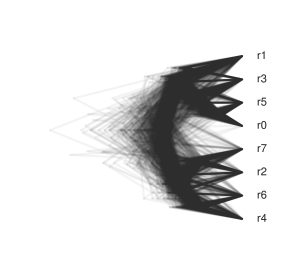

In [28]:
mtre.draw_cloud_tree(fixed_order=True);

In [29]:
sms = mod_sg.seqs

distmat_sg = np.zeros((len(sms),len(sms)),dtype=np.int64)
for row in range(distmat_sg.shape[0]):
    for col in range(distmat_sg.shape[1]):
        distmat_sg[row,col] = np.sum(sms[row] != sms[col])

In [30]:
# compare these snp distances to the topological differences
# i.e. big numbers should match long topological distances, short numbers should match short distances
# looks good!
distmat_sg

array([[  0, 289, 349, 218, 373, 149, 388, 339],
       [289,   0, 348, 269, 377, 292, 389, 338],
       [349, 348,   0, 337, 287, 353, 303, 188],
       [218, 269, 337,   0, 357, 219, 370, 326],
       [373, 377, 287, 357,   0, 377, 232, 282],
       [149, 292, 353, 219, 377,   0, 393, 342],
       [388, 389, 303, 370, 232, 393,   0, 297],
       [339, 338, 188, 326, 282, 342, 297,   0]])

## now test with `SeqModel`

In [31]:
# or define a model with Ne = 1e6
mod = ipcoal.Model(tree=tree, 
                      Ne=1e5, 
                      recomb=0,
                      mut=1e-8,
                      seed=123,
                      seed_mutations=np.random.randint(1e9))

# seqgen sim
mod_sm = mod.sim_snps(1000,seqgen=False)

In [32]:
mtre=toytree.mtree(mod_sm.df['genealogy'])

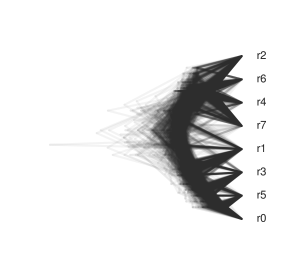

In [33]:
mtre.draw_cloud_tree(fixed_order=True);

In [34]:
sms = mod_sm.seqs

distmat_sm = np.zeros((len(sms),len(sms)),dtype=np.int64)
for row in range(distmat_sm.shape[0]):
    for col in range(distmat_sm.shape[1]):
        distmat_sm[row,col] = np.sum(sms[row] != sms[col])

In [35]:
# compare these snp distances to the topological differences
# i.e. big numbers should match long topological distances, short numbers should match short distances
# looks good!
distmat_sm

array([[  0, 309, 359, 222, 354, 164, 364, 349],
       [309,   0, 358, 314, 353, 287, 361, 346],
       [359, 358,   0, 355, 280, 331, 280, 205],
       [222, 314, 355,   0, 352, 208, 362, 345],
       [354, 353, 280, 352,   0, 327, 202, 275],
       [164, 287, 331, 208, 327,   0, 336, 321],
       [364, 361, 280, 362, 202, 336,   0, 275],
       [349, 346, 205, 345, 275, 321, 275,   0]])

## use new functions

In [5]:
# or define a model with Ne = 1e6
mod = ipcoal.Model(tree=tree, 
                      Ne=1e6, 
                      recomb=0,
                      mut=1e-8,
                      seed=123)

# seqgen sim
mod_sm = mod.sim_loci(5,50000,seqgen=False)

### We should compare sequences by locus, since each locus has a different topology (only one genealogy since I set the recomb rate to 0)

### locus 0

In [6]:
loc = 0

In [7]:
toytree.tree(mod_sm.df['genealogy'][loc]).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="tcf5fe0ff620248b7b30ee098a9aa06cc" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r3 r6 r0 r5 r4 r2 r7 idx: 0
name: r1
dist: 882965.0000
support: 100
height: 0.0000 0 idx: 1
name: r3
dist: 882965.0000
support: 100
height: 0.0000 1 idx: 2
name: r6
dist: 1671160.0000
support: 100
height: 5.0000 2 idx: 3
name: r0
dist: 722180.0000
support: 100
height: 0.4000 3 idx: 4
name: r5
dist: 722180.0000
support: 100
height: 0.4000 4 idx: 5
name: r4
dist: 1152730.0000
support: 100
height: 3.4000 5 idx: 6
name: r2
dist: 1294850.0000
support: 100
height: 0.4000 6 idx: 7
name: r7
dist: 1294850.0000
support: 100
height: 0.4000 7 idx: 8
name: 8
dist: 788200.0000
support: 100
height: 882965.0000 8 idx: 9
name: 9
dist: 430553.0000
support: 100
height: 722180.4000 9 idx: 10
name: 10
dist: 63475.4000
support: 100
height: 1671165.0000 10 idx: 11
name: 11
dist: 581907.0000
support: 100
height: 1152733.4000 11 idx: 12
name: 12
dist: 1294850.0000
support: 100
height: 1734640.4000 12 idx: 13
name: 13
dist: 1734640.0000
support: 100
height: 1294850.4000 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 3029490.4000 14 0 1514745 3029490

In [8]:
ipcoal.utils.calculate_pairwise_dist(mod_sm,
                                     locus=loc)

,r0,r1,r2,r3,r4,r5,r6,r7
r0,0.000000,0.036396,0.048372,0.055444,0.046960,0.046436,0.036532,0.060420
r1,0.036396,0.000000,0.037788,0.045800,0.055356,0.060636,0.040980,0.053548
r2,0.048372,0.037788,0.000000,0.055540,0.061700,0.071648,0.048196,0.049548
r3,0.055444,0.045800,0.055540,0.000000,0.059660,0.047544,0.049212,0.058156
r4,0.046960,0.055356,0.061700,0.059660,0.000000,0.046628,0.045228,0.037864
r5,0.046436,0.060636,0.071648,0.047544,0.046628,0.000000,0.062388,0.060648
r6,0.036532,0.040980,0.048196,0.049212,0.045228,0.062388,0.000000,0.054320
r7,0.060420,0.053548,0.049548,0.058156,0.037864,0.060648,0.054320,0.000000


### locus 1

In [10]:
loc = 1

In [11]:
toytree.tree(mod_sm.df['genealogy'][loc]).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="tbd04f7fdc5bc4a12aecc23bc6f14b5d0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r4 r5 r6 r1 r7 r2 r3 idx: 0
name: r0
dist: 1124040.0000
support: 100
height: 0.1300 0 idx: 1
name: r4
dist: 1124040.0000
support: 100
height: 0.1300 1 idx: 2
name: r5
dist: 1269090.0000
support: 100
height: 4.1300 2 idx: 3
name: r6
dist: 2027530.0000
support: 100
height: 1.1300 3 idx: 4
name: r1
dist: 1176140.0000
support: 100
height: 0.0000 4 idx: 5
name: r7
dist: 1176140.0000
support: 100
height: 0.0000 5 idx: 6
name: r2
dist: 1202820.0000
support: 100
height: 4.9000 6 idx: 7
name: r3
dist: 1211390.0000
support: 100
height: 4.1300 7 idx: 8
name: 8
dist: 145054.0000
support: 100
height: 1124040.1300 8 idx: 9
name: 9
dist: 26684.9000
support: 100
height: 1176140.0000 9 idx: 10
name: 10
dist: 758437.0000
support: 100
height: 1269094.1300 10 idx: 11
name: 11
dist: 8569.2300
support: 100
height: 1202824.9000 11 idx: 12
name: 12
dist: 837853.0000
support: 100
height: 2027531.1300 12 idx: 13
name: 13
dist: 1653990.0000
support: 100
height: 1211394.1300 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 2865384.1300 14 0 1432692 2865384

In [12]:
ipcoal.utils.calculate_pairwise_dist(mod_sm,
                                     locus=loc)

,r0,r1,r2,r3,r4,r5,r6,r7
r0,0.00000,0.05642,0.05590,0.05566,0.02242,0.02474,0.04080,0.05626
r1,0.05642,0.00000,0.02486,0.02504,0.05552,0.05520,0.05660,0.02452
r2,0.05590,0.02486,0.00000,0.02456,0.05512,0.05492,0.05670,0.02484
r3,0.05566,0.02504,0.02456,0.00000,0.05490,0.05450,0.05620,0.02500
r4,0.02242,0.05552,0.05512,0.05490,0.00000,0.02396,0.04010,0.05546
r5,0.02474,0.05520,0.05492,0.05450,0.02396,0.00000,0.03974,0.05506
r6,0.04080,0.05660,0.05670,0.05620,0.04010,0.03974,0.00000,0.05666
r7,0.05626,0.02452,0.02484,0.02500,0.05546,0.05506,0.05666,0.00000


### locus 2

In [13]:
loc = 2

In [14]:
toytree.tree(mod_sm.df['genealogy'][loc]).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t86f802a8f7bd44c797033bebf7d3f358" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r4 r6 r7 r3 r0 r5 r1 r2 idx: 0
name: r4
dist: 679260.0000
support: 100
height: 4.4000 0 idx: 1
name: r6
dist: 679260.0000
support: 100
height: 4.4000 1 idx: 2
name: r7
dist: 1078480.0000
support: 100
height: 8.4000 2 idx: 3
name: r3
dist: 1138510.0000
support: 100
height: 3.0000 3 idx: 4
name: r0
dist: 299503.0000
support: 100
height: 0.0000 4 idx: 5
name: r5
dist: 299503.0000
support: 100
height: 0.0000 5 idx: 6
name: r1
dist: 1456520.0000
support: 100
height: 3.0000 6 idx: 7
name: r2
dist: 3196440.0000
support: 100
height: 1.0000 7 idx: 8
name: 8
dist: 399224.0000
support: 100
height: 679264.4000 8 idx: 9
name: 9
dist: 60024.6000
support: 100
height: 1078488.4000 9 idx: 10
name: 10
dist: 1157020.0000
support: 100
height: 299503.0000 10 idx: 11
name: 11
dist: 1546930.0000
support: 100
height: 1138513.0000 11 idx: 12
name: 12
dist: 1228920.0000
support: 100
height: 1456523.0000 12 idx: 13
name: 13
dist: 510998.0000
support: 100
height: 2685443.0000 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 3196441.0000 14 0 1598220 3196441

In [15]:
ipcoal.utils.calculate_pairwise_dist(mod_sm,
                                     locus=loc)

,r0,r1,r2,r3,r4,r5,r6,r7
r0,0.00000,0.02888,0.06140,0.05196,0.05108,0.00668,0.05116,0.05222
r1,0.02888,0.00000,0.06040,0.05116,0.05042,0.02846,0.05048,0.05168
r2,0.06140,0.06040,0.00000,0.06038,0.05952,0.06126,0.05996,0.06098
r3,0.05196,0.05116,0.06038,0.00000,0.02178,0.05168,0.02192,0.02306
r4,0.05108,0.05042,0.05952,0.02178,0.00000,0.05082,0.01344,0.02120
r5,0.00668,0.02846,0.06126,0.05168,0.05082,0.00000,0.05092,0.05208
r6,0.05116,0.05048,0.05996,0.02192,0.01344,0.05092,0.00000,0.02138
r7,0.05222,0.05168,0.06098,0.02306,0.02120,0.05208,0.02138,0.00000


### locus 3

In [16]:
loc = 3

In [17]:
toytree.tree(mod_sm.df['genealogy'][loc]).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t3a99c7444eb4417b9dd0a19f1d95895e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r6 r3 r2 r5 r4 r7 idx: 0
name: r1
dist: 1191410.0000
support: 100
height: 3.0000 0 idx: 1
name: r0
dist: 1191410.0000
support: 100
height: 3.0000 1 idx: 2
name: r6
dist: 1353740.0000
support: 100
height: 0.0000 2 idx: 3
name: r3
dist: 1359250.0000
support: 100
height: 5.4600 3 idx: 4
name: r2
dist: 1472300.0000
support: 100
height: 0.4600 4 idx: 5
name: r5
dist: 1449920.0000
support: 100
height: 2.4600 5 idx: 6
name: r4
dist: 1449920.0000
support: 100
height: 2.4600 6 idx: 7
name: r7
dist: 1737200.0000
support: 100
height: 0.4600 7 idx: 8
name: 8
dist: 162327.0000
support: 100
height: 1191413.0000 8 idx: 9
name: 9
dist: 5515.4600
support: 100
height: 1353740.0000 9 idx: 10
name: 10
dist: 113045.0000
support: 100
height: 1359255.4600 10 idx: 11
name: 11
dist: 287278.0000
support: 100
height: 1449922.4600 11 idx: 12
name: 12
dist: 2826030.0000
support: 100
height: 1472300.4600 12 idx: 13
name: 13
dist: 2561130.0000
support: 100
height: 1737200.4600 13 idx: 14
name: 14
dist: 1.0000
support: 100
height: 4298330.4600 14 0 2149165 4298330

In [18]:
ipcoal.utils.calculate_pairwise_dist(mod_sm,
                                     locus=loc)

,r0,r1,r2,r3,r4,r5,r6,r7
r0,0.00000,0.02318,0.02868,0.02630,0.07980,0.07844,0.02710,0.07924
r1,0.02318,0.00000,0.02850,0.02612,0.07968,0.07846,0.02678,0.07908
r2,0.02868,0.02850,0.00000,0.02856,0.08004,0.07878,0.02954,0.07960
r3,0.02630,0.02612,0.02856,0.00000,0.07940,0.07844,0.02716,0.07896
r4,0.07980,0.07968,0.08004,0.07940,0.00000,0.02802,0.08080,0.03454
r5,0.07844,0.07846,0.07878,0.07844,0.02802,0.00000,0.07972,0.03346
r6,0.02710,0.02678,0.02954,0.02716,0.08080,0.07972,0.00000,0.08018
r7,0.07924,0.07908,0.07960,0.07896,0.03454,0.03346,0.08018,0.00000


### locus 4

In [19]:
loc = 4

In [20]:
toytree.tree(mod_sm.df['genealogy'][loc]).draw(ts="p");

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t4827709720564451bb25f6af8863f0a4" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r6 r1 r2 r7 r4 r3 r5 idx: 0
name: r0
dist: 1474780
support: 100
height: 0 0 idx: 1
name: r6
dist: 1474780
support: 100
height: 0 1 idx: 2
name: r1
dist: 1006790
support: 100
height: 2 2 idx: 3
name: r2
dist: 1006790
support: 100
height: 2 3 idx: 4
name: r7
dist: 1169820
support: 100
height: 2 4 idx: 5
name: r4
dist: 1169820
support: 100
height: 2 5 idx: 6
name: r3
dist: 1004810
support: 100
height: 2 6 idx: 7
name: r5
dist: 1004810
support: 100
height: 2 7 idx: 8
name: 8
dist: 535652
support: 100
height: 1474780 8 idx: 9
name: 9
dist: 1003640
support: 100
height: 1006792 9 idx: 10
name: 10
dist: 989060
support: 100
height: 2010432 10 idx: 11
name: 11
dist: 1829670
support: 100
height: 1169822 11 idx: 12
name: 12
dist: 2940530
support: 100
height: 2999492 12 idx: 13
name: 13
dist: 4935210
support: 100
height: 1004812 13 idx: 14
name: 14
dist: 1
support: 100
height: 5940022 14 0 2970011 5940022

In [21]:
ipcoal.utils.calculate_pairwise_dist(mod_sm,
                                     locus=loc)

,r0,r1,r2,r3,r4,r5,r6,r7
r0,0.00000,0.04026,0.03944,0.10858,0.05854,0.10760,0.02954,0.05794
r1,0.04026,0.00000,0.02066,0.10924,0.05864,0.10828,0.03990,0.05804
r2,0.03944,0.02066,0.00000,0.10804,0.05798,0.10706,0.03918,0.05746
r3,0.10858,0.10924,0.10804,0.00000,0.10828,0.01888,0.10838,0.10758
r4,0.05854,0.05864,0.05798,0.10828,0.00000,0.10742,0.05822,0.02244
r5,0.10760,0.10828,0.10706,0.01888,0.10742,0.00000,0.10764,0.10664
r6,0.02954,0.03990,0.03918,0.10838,0.05822,0.10764,0.00000,0.05778
r7,0.05794,0.05804,0.05746,0.10758,0.02244,0.10664,0.05778,0.00000
